<a href="https://colab.research.google.com/github/YashwantRaj-dev/UA-Dataset-Analysis/blob/main/UNITED_AIRLINES_DATA_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
data1 = pd.read_csv('Inflight Service_Inventory data.csv')
data2 = pd.read_csv('Inflight Service_Pre order data.csv')
data3 = pd.read_csv('Survey data _Customer comments.csv')
data4 = pd.read_csv('Survey data_Inflight Satisfaction Score.csv')

In [51]:
print(data1.shape)
print(data2.shape)
print(data3.shape)
print(data4.shape)

(61267, 9)
(212039, 13)
(9424, 14)
(47074, 31)


In [52]:
data1 = data1.dropna()
data2 = data2.dropna()
data3 = data3.dropna()
data4 = data4.dropna()

In [53]:
print(data1.shape)
print(data2.shape)
print(data3.shape)
print(data4.shape)

(61267, 9)
(137062, 13)
(6920, 14)
(14032, 31)


In [54]:
data4['score'].value_counts()

2    3465
1    2933
3    2867
4    2447
5    2320
Name: score, dtype: int64

In [55]:
percentage_inflight_satisfaction = ((2447+2320)/(2933+3465+2867+2447+2320))*100
print(percentage_inflight_satisfaction)

33.97234891676169


Nearly 34% of users are satisfied with the services of the airlines.

And nearly 66% of users are dissatisfied with the services of the airlines.

In [56]:
data4.head()

,flight_number,origin_station_code,destination_station_code,record_locator,scheduled_departure_date,question_text,score,satisfaction_type,driver_sub_group1,driver_sub_group2,...,equipment_type_code,ua_uax,actual_flown_miles,haul_type,departure_gate,arrival_gate,international_domestic_indicator,response_group,media_provider,hub_spoke
9,4635,ASX,DEX,BNXXXJ,9/1/2022,How satisfied were you with the food & beverag...,3,Dissatisfied,food & beverage,food and beverage satisfaction,...,CR7,UAX,126,Short,3,B55,Domestic,member,GOGO,spoke departure
13,1646,IAX,AUX,MMXXPM,9/1/2022,How satisfied were you with the food & beverag...,1,Dissatisfied,food & beverage,food and beverage satisfaction,...,73Y,UA,141,Short,C45,27,Domestic,member,THALES,hub departure
15,4749,HDX,DEX,LRXXD6,9/1/2022,How satisfied were you with the food & beverag...,2,Dissatisfied,food & beverage,food and beverage satisfaction,...,E7Q,UAX,142,Short,3,A77,Domestic,member,GOGO,spoke departure
16,4176,ALX,EWX,AFXX8D,9/1/2022,How satisfied were you with the food & beverag...,3,Dissatisfied,food & beverage,food and beverage satisfaction,...,C5G,UAX,143,Short,A4,A28,Domestic,member,GOGO,spoke departure
20,3632,ORX,INX,A0XXRT,9/1/2022,How satisfied were you with the food & beverag...,1,Dissatisfied,food & beverage,food and beverage satisfaction,...,E7R,UAX,177,Short,C7,A24,Domestic,member,GOGO,hub departure


In [57]:
'''data4['month'] = data4['scheduled_departure_date'].dt.month
data4 = data4['month'].isin([3,4,5,6, 7, 8,9])'''

"data4['month'] = data4['scheduled_departure_date'].dt.month\ndata4 = data4['month'].isin([3,4,5,6, 7, 8,9])"

In [58]:
print(data4['driver_sub_group1'].value_counts())
print(data4['driver_sub_group2'].value_counts())

food & beverage    14032
Name: driver_sub_group1, dtype: int64
food and beverage satisfaction    14032
Name: driver_sub_group2, dtype: int64


In [59]:
data4['arrival_delay_group'].value_counts()

Early & Ontime    9865
Delayed           4167
Name: arrival_delay_group, dtype: int64

4167 (29% of total) flights got delayed.
9865 (71% of total) flights were either early or ontime.

In [60]:
data4['satisfaction_status'] = data4['satisfaction_type'].apply(lambda x: 0 if x == 'Satisfied' else 1)
data4['satisfaction_status'].value_counts()

1    9265
0    4767
Name: satisfaction_status, dtype: int64

In [61]:
data4['loyalty_program_level'].value_counts()

non-elite           9984
premier silver      1609
premier gold        1013
premier 1k           764
premier platinum     608
global services       51
NBK                    3
Name: loyalty_program_level, dtype: int64

In [62]:
count_premier_gold_dissatisfied = data4[(data4['loyalty_program_level'] == 'premier gold') & (data4['satisfaction_status'] == 1)].shape[0]
print(count_premier_gold_dissatisfied)

count_premier_silver_dissatisfied = data4[(data4['loyalty_program_level'] == 'premier silver') & (data4['satisfaction_status'] == 1)].shape[0]
print(count_premier_silver_dissatisfied)

count_premier_platinum_dissatisfied = data4[(data4['loyalty_program_level'] == 'premier platinum') & (data4['satisfaction_status'] == 1)].shape[0]
print(count_premier_platinum_dissatisfied)

count_premier_1k_dissatisfied = data4[(data4['loyalty_program_level'] == 'premier 1k') & (data4['satisfaction_status'] == 1)].shape[0]
print(count_premier_1k_dissatisfied)

count_premier_nonelite_dissatisfied = data4[(data4['loyalty_program_level'] == 'non-elite') & (data4['satisfaction_status'] == 1)].shape[0]
print(count_premier_nonelite_dissatisfied)

681
1073
437
526
6508


It is evident that there are dissatisfied members/customers in all levels of the loyalty program.

```
```



In [63]:
data4['international_domestic_indicator'].value_counts()

Domestic         9787
International    4245
Name: international_domestic_indicator, dtype: int64

The airline has more domestic customers and less international customers.

In [64]:
count_domestic_dissatisfied = data4[(data4['international_domestic_indicator'] == 'Domestic') & (data4['satisfaction_status'] == 1)].shape[0]
print(count_domestic_dissatisfied)

6379


Nearly 2/3rd of the domestic customers are dissatisfied.

In [65]:
data3_c = data3
negative_keywords = ['not satisfied', 'disappointed', 'bad experience', 'poor service', 'unhappy','should']
negative_comments = data3_c[data3_c['verbatim_text'].str.contains('|'.join(negative_keywords), case=False)]
data3_c['verbatim_text'].value_counts()

No.                                                                                                                                                                                                        491
no.                                                                                                                                                                                                         81
None.                                                                                                                                                                                                       41
N/A.                                                                                                                                                                                                        19
Nothing.                                                                                                                                                                    

In [66]:
print(negative_comments['verbatim_text'])

9       I thought a 3rd entree should be offered. no r...
36      on our return flight we were asked to choose e...
61      should give out bottles of water vs cups on a ...
66      Tje Brioche cheeseburger is really good, but k...
83      The only beers available were Ultra Lite and S...
                              ...                        
9304    It took too long to serve the beverages and wa...
9311    A 6 hour flight is long haul. Food should be p...
9377    Disappointed to have no choice of food conside...
9393    United should allow business/first passengers ...
9403    The dinner roll was hard and tough. It should ...
Name: verbatim_text, Length: 450, dtype: object


Through the negative comments obtained from the customers, it is evident that for oders that were not pre-booked (orders not under the category of pre-orders), the food & beverage staffs take quite a long time to respond. So waiting time was high.

Variety of food items in terms of snacks and beverages such as beers is less.

Some Customers are also demanding water in bottles instead of cups.

Orders under the category of pre-oder are delivered well within time.
Customers who pre-order their meals have a better satisfaction rate compared to those who do not. However,only a small fraction of travelers prebook meals at this point.

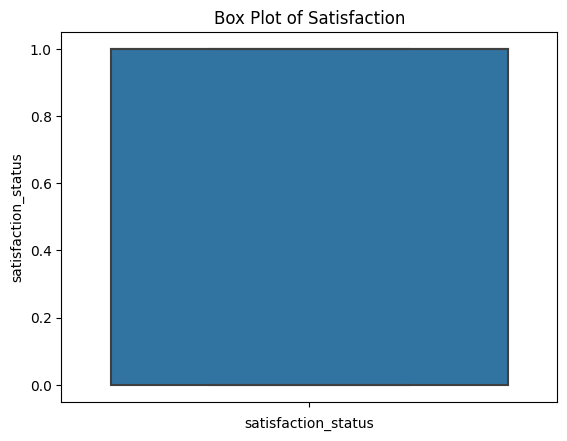

In [70]:
sns.boxplot(y='satisfaction_status', data=data4)
plt.xlabel('satisfaction_status')
plt.title('Box Plot of Satisfaction')
plt.show()

In [71]:
data4['score'] = pd.to_numeric(data4['score'], errors='coerce')
data4_cleaned = data4.dropna(subset=['score'])

<Axes: ylabel='score'>

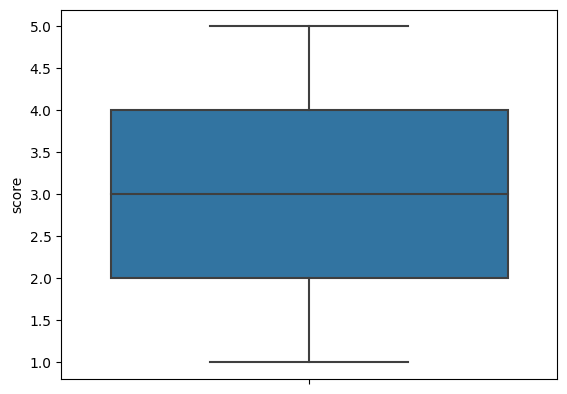

In [72]:
sns.boxplot(y='score', data=data4)

In [74]:
correlation = data4['score'].corr(data4['satisfaction_status'])
print(correlation)

-0.8584036727680153


In [76]:
'''negative_comments['verbatim_text']
negative_comments['score']'''

'''
import scipy.stats as stats

correlation, p_value = stats.pointbiserialr(negative_comments['verbatim_text'], negative_comments['score'])

print("Point-Biserial Correlation:", correlation)
print("p-value:", p_value)
'''

'\nimport scipy.stats as stats\n\ncorrelation, p_value = stats.pointbiserialr(negative_comments[\'verbatim_text\'], negative_comments[\'score\'])\n\nprint("Point-Biserial Correlation:", correlation)\nprint("p-value:", p_value)\n'